# Polynomial Regression

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

## Importing the dataset

In [2]:
data = pd.read_csv('Position_Salaries.csv')

## Analyze data

In [3]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
data.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [7]:
data.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


### Visualizing the  data

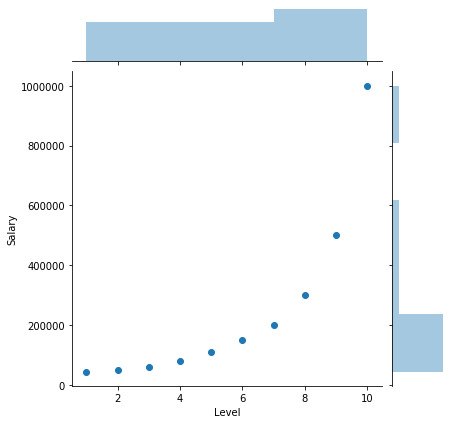

In [8]:
sns.jointplot(x='Level',y='Salary',data=data)

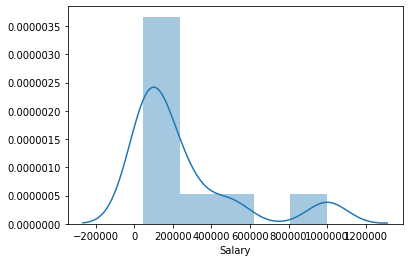

In [9]:
sns.distplot(data['Salary'])

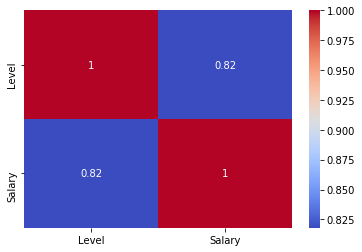

In [10]:
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

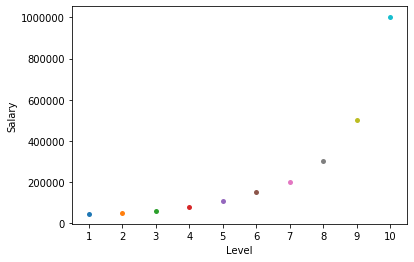

In [11]:
sns.swarmplot(x='Level',y='Salary',data=data)

### Cleaning data

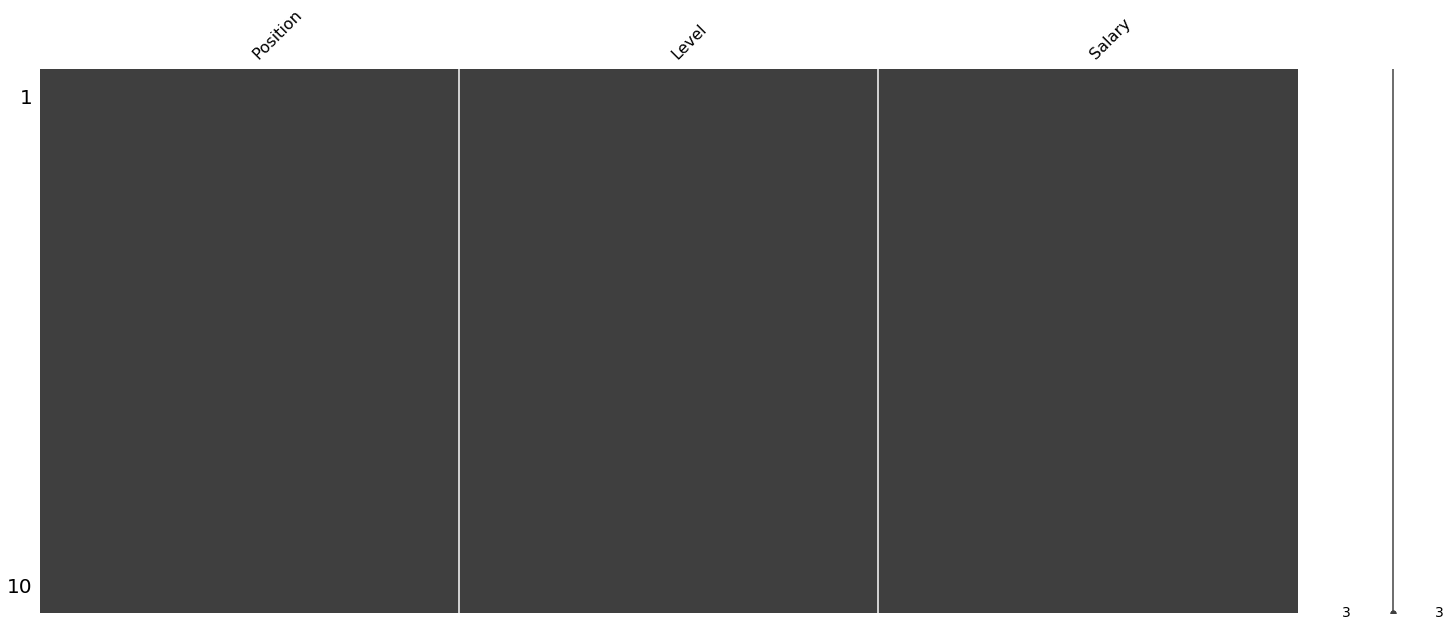

In [12]:
ms.matrix(data)

In [13]:
old_data = data.copy()

In [14]:
data = data.drop('Position',axis=1)

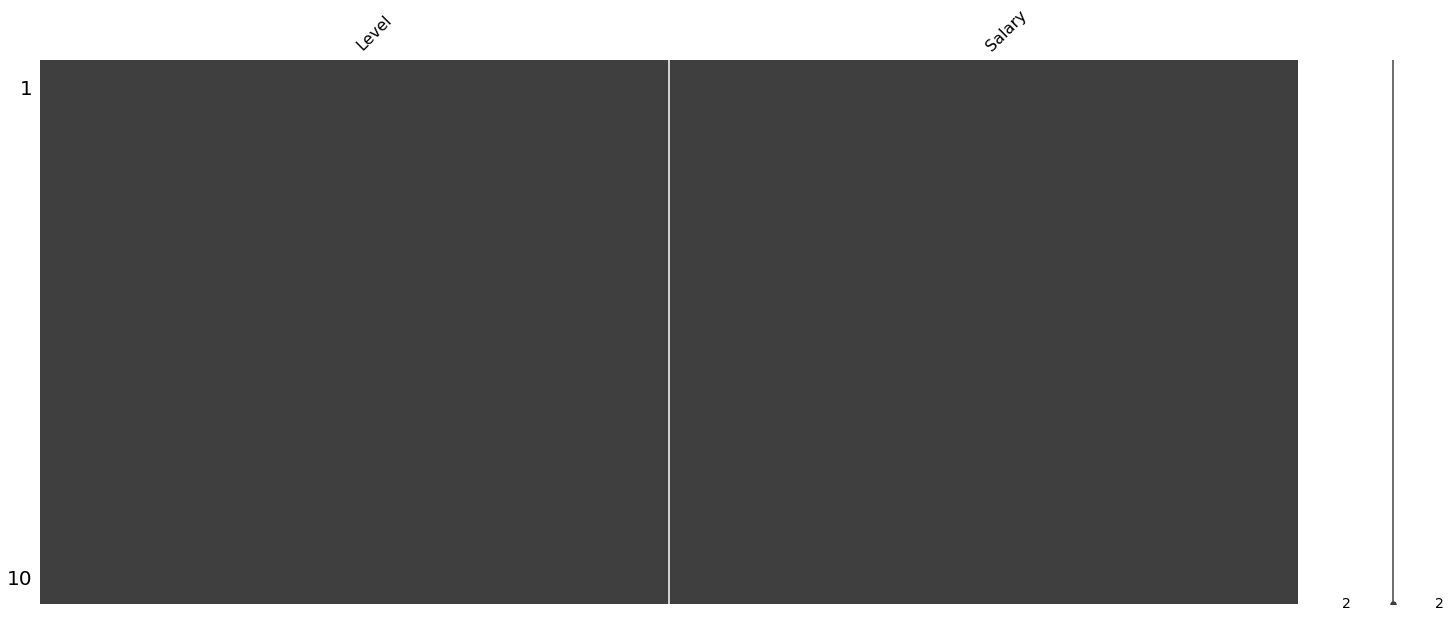

In [15]:
ms.matrix(data)

### Categorical Conversion

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


## Training the Linear Regression model on the whole dataset

In [17]:
x = data.drop('Salary',axis=1)
y = data['Salary']

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
linearRegression = LinearRegression()

In [20]:
linearRegression.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
polynomialFeature = PolynomialFeatures(degree=4)

In [23]:
X_poly = polynomialFeature.fit_transform(x)

In [24]:
print(X_poly)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


In [25]:
linearRegression2 = LinearRegression()
linearRegression2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results

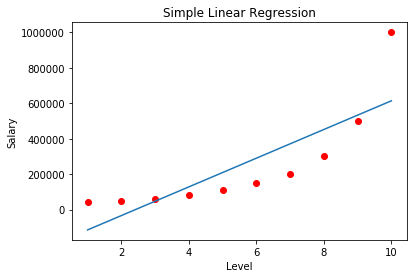

In [26]:
plt.scatter(x,y,color="Red")
plt.plot(x,linearRegression.predict(x))
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Simple Linear Regression")
plt.show()

## Visualising the Polynomial Regression results

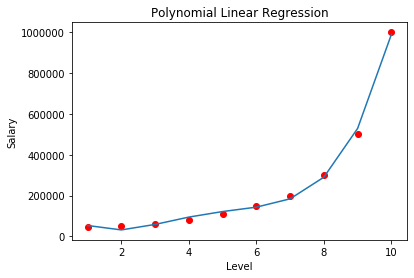

In [27]:
plt.scatter(x,y,color="Red")
plt.plot(x,linearRegression2.predict(X_poly))
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Polynomial Linear Regression")
plt.show()

## Predicting a new result with Linear Regression

In [28]:
linearRegression.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [29]:
linearRegression2.predict(polynomialFeature.fit_transform([[6.5]]))

array([158862.45265153])

### Intercept and Coefficients

In [30]:
linearRegression.intercept_

-195333.3333333332

In [31]:
linearRegression.coef_

array([80878.78787879])